In [390]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [391]:
df_train = pd.read_csv('archive (1)/loan_sanction_train.csv')

In [392]:
df_test = pd.read_csv('archive (1)/loan_sanction_test.csv')

In [393]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [394]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [395]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [396]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [397]:
df = df_train.dropna(subset = ['Credit_History'])

In [398]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         549 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      538 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [400]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [401]:
df['Dependents'] = df['Dependents'].fillna('0')

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [403]:
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = df.select_dtypes(include=num_dtypes)
num = num_df.columns

print(num)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [404]:
df[num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,5466.436170,1530.448440,145.088398,342.152727,0.842199
std,6271.344106,2471.721359,81.740935,63.778190,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.750000,0.000000,101.750000,360.000000,1.000000
50%,3815.000000,1105.500000,128.500000,360.000000,1.000000
75%,5803.750000,2250.000000,162.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [405]:
cat_dtypes = ['object']

cat_df = df.select_dtypes(include=cat_dtypes)
cat = cat_df.columns

print(cat)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [406]:
df[cat].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,564,552,561,564,564,564,564,564
unique,564,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,451,362,331,443,489,217,385


In [407]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Loan_ID:
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001666    1
LP001665    1
LP001664    1
LP001658    1
LP002990    1
Name: Loan_ID, Length: 564, dtype: int64

Value count kolom Gender:
Male      451
Female    101
Name: Gender, dtype: int64

Value count kolom Married:
Yes    362
No     199
Name: Married, dtype: int64

Value count kolom Dependents:
0     331
2      95
1      90
3+     48
Name: Dependents, dtype: int64

Value count kolom Education:
Graduate        443
Not Graduate    121
Name: Education, dtype: int64

Value count kolom Self_Employed:
No     489
Yes     75
Name: Self_Employed, dtype: int64

Value count kolom Property_Area:
Semiurban    217
Urban        182
Rural        165
Name: Property_Area, dtype: int64

Value count kolom Loan_Status:
Y    385
N    179
Name: Loan_Status, dtype: int64



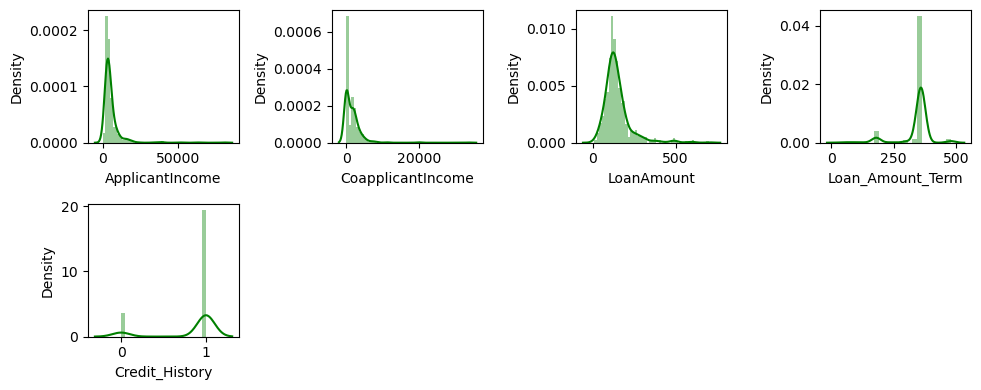

In [408]:
plt.figure(figsize=(10,4))
for i in range(0, len(num)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df[num[i]], color='green')
    plt.tight_layout()

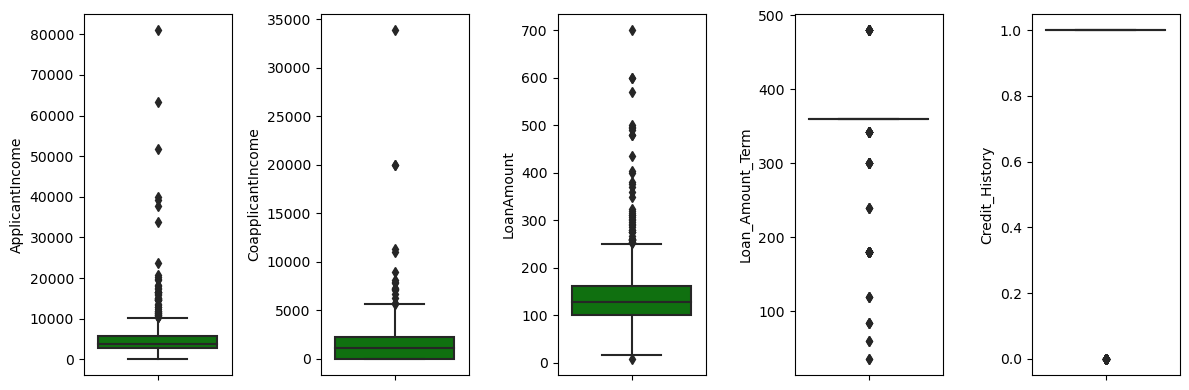

In [409]:
plt.figure(figsize=(12,4))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='green', orient='v')
    plt.tight_layout()

In [410]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['ApplicantIncome'] <= high_limit))
df_tes = df[filtered_entries]

In [411]:
Q1 = df_tes['CoapplicantIncome'].quantile(0.25)
Q3 = df_tes['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['CoapplicantIncome'] <= high_limit))
df_train = df_tes[filtered_entries]

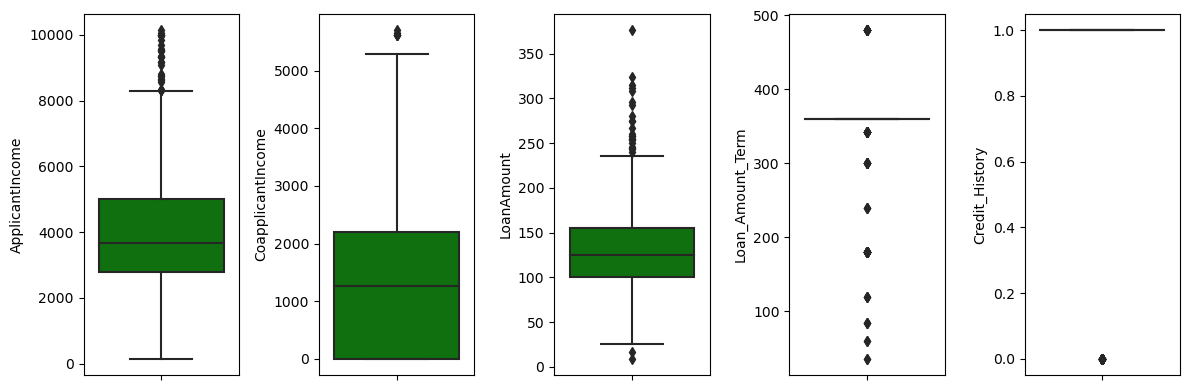

In [412]:
plt.figure(figsize=(12,4))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df_train[num[i]], color='green', orient='v')
    plt.tight_layout()

In [413]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,503.000000,503.000000,503.000000,503.000000,503.000000
mean,4151.141153,1330.735427,130.556023,342.731885,0.842942
std,1933.975806,1434.400868,50.948866,64.458376,0.364217
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2793.000000,0.000000,100.000000,360.000000,1.000000
50%,3667.000000,1260.000000,125.000000,360.000000,1.000000
75%,5000.000000,2204.500000,155.000000,360.000000,1.000000
max,10139.000000,5701.000000,376.000000,480.000000,1.000000


In [414]:
df_cat = df_train[cat]
data_cat_unique = df_cat.nunique().reset_index()
data_cat_unique.columns = ['feature', 'unique value']
data_cat_unique = data_cat_unique.sort_values('unique value', ascending=False)
data_cat_unique

,feature,unique value
0,Loan_ID,503
3,Dependents,4
6,Property_Area,3
1,Gender,2
2,Married,2
4,Education,2
5,Self_Employed,2
7,Loan_Status,2


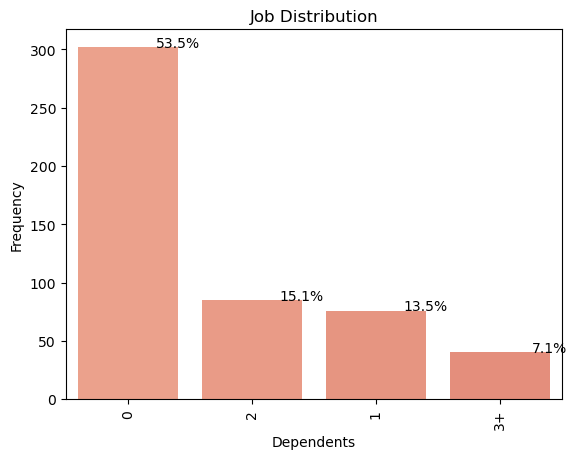

In [415]:
job = sns.countplot(x='Dependents', data=df_cat, order = df_cat['Dependents'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df))
for p in job.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    job.annotate(percentage, (x, y),ha='center')
plt.title('Job Distribution')
plt.ylabel('Frequency')
plt.xlabel('Dependents')
plt.xticks(rotation = 90)
plt.show()

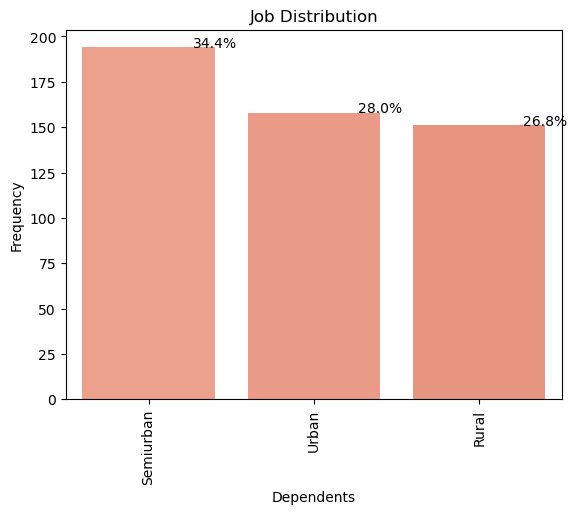

In [416]:
job = sns.countplot(x='Property_Area', data=df_cat, order = df_cat['Property_Area'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df))
for p in job.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    job.annotate(percentage, (x, y),ha='center')
plt.title('Job Distribution')
plt.ylabel('Frequency')
plt.xlabel('Dependents')
plt.xticks(rotation = 90)
plt.show()

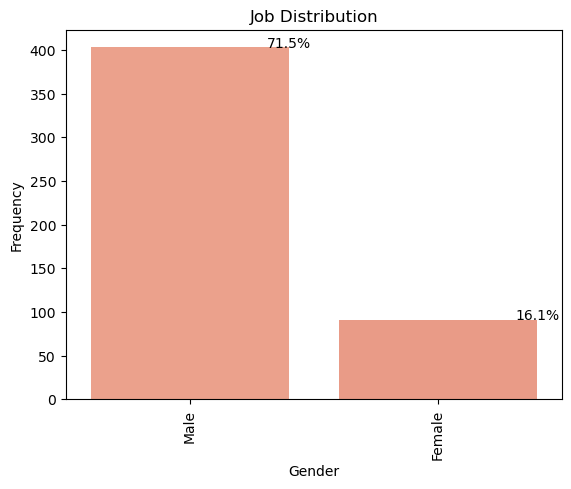

In [417]:
job = sns.countplot(x='Gender', data=df_cat, order = df_cat['Gender'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df))
for p in job.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    job.annotate(percentage, (x, y),ha='center')
plt.title('Job Distribution')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.xticks(rotation = 90)
plt.show()

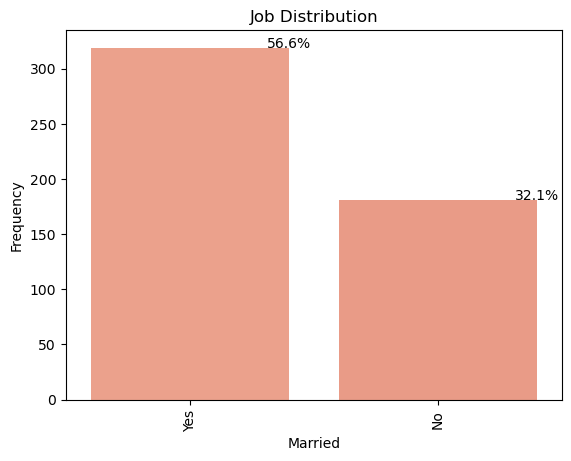

In [418]:
job = sns.countplot(x='Married', data=df_cat, order = df_cat['Married'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df))
for p in job.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    job.annotate(percentage, (x, y),ha='center')
plt.title('Job Distribution')
plt.ylabel('Frequency')
plt.xlabel('Married')
plt.xticks(rotation = 90)
plt.show()

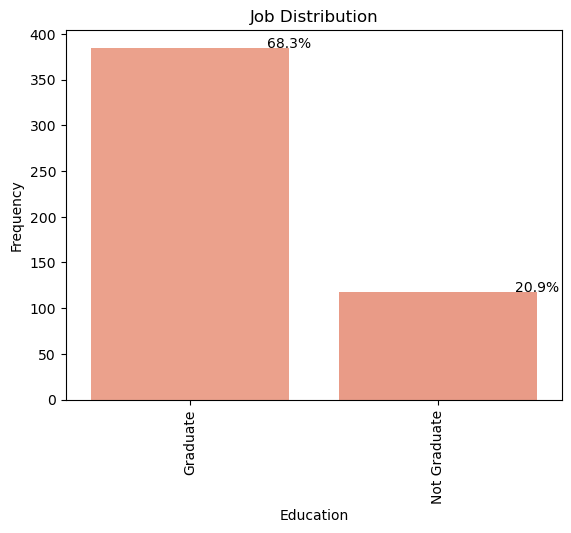

In [419]:
job = sns.countplot(x='Education', data=df_cat, order = df_cat['Education'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df))
for p in job.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    job.annotate(percentage, (x, y),ha='center')
plt.title('Job Distribution')
plt.ylabel('Frequency')
plt.xlabel('Education')
plt.xticks(rotation = 90)
plt.show()

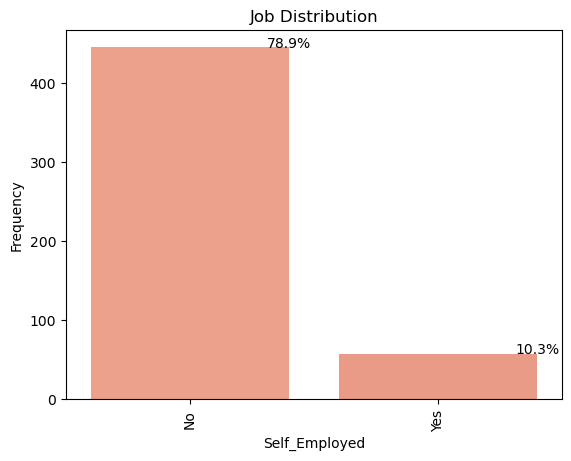

In [420]:
job = sns.countplot(x='Self_Employed', data=df_cat, order = df_cat['Self_Employed'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df))
for p in job.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    job.annotate(percentage, (x, y),ha='center')
plt.title('Job Distribution')
plt.ylabel('Frequency')
plt.xlabel('Self_Employed')
plt.xticks(rotation = 90)
plt.show()

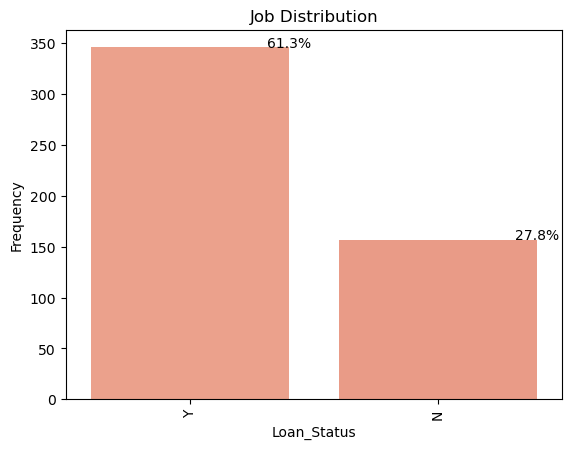

In [421]:
job = sns.countplot(x='Loan_Status', data=df_cat, order = df_cat['Loan_Status'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df))
for p in job.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    job.annotate(percentage, (x, y),ha='center')
plt.title('Job Distribution')
plt.ylabel('Frequency')
plt.xlabel('Loan_Status')
plt.xticks(rotation = 90)
plt.show()

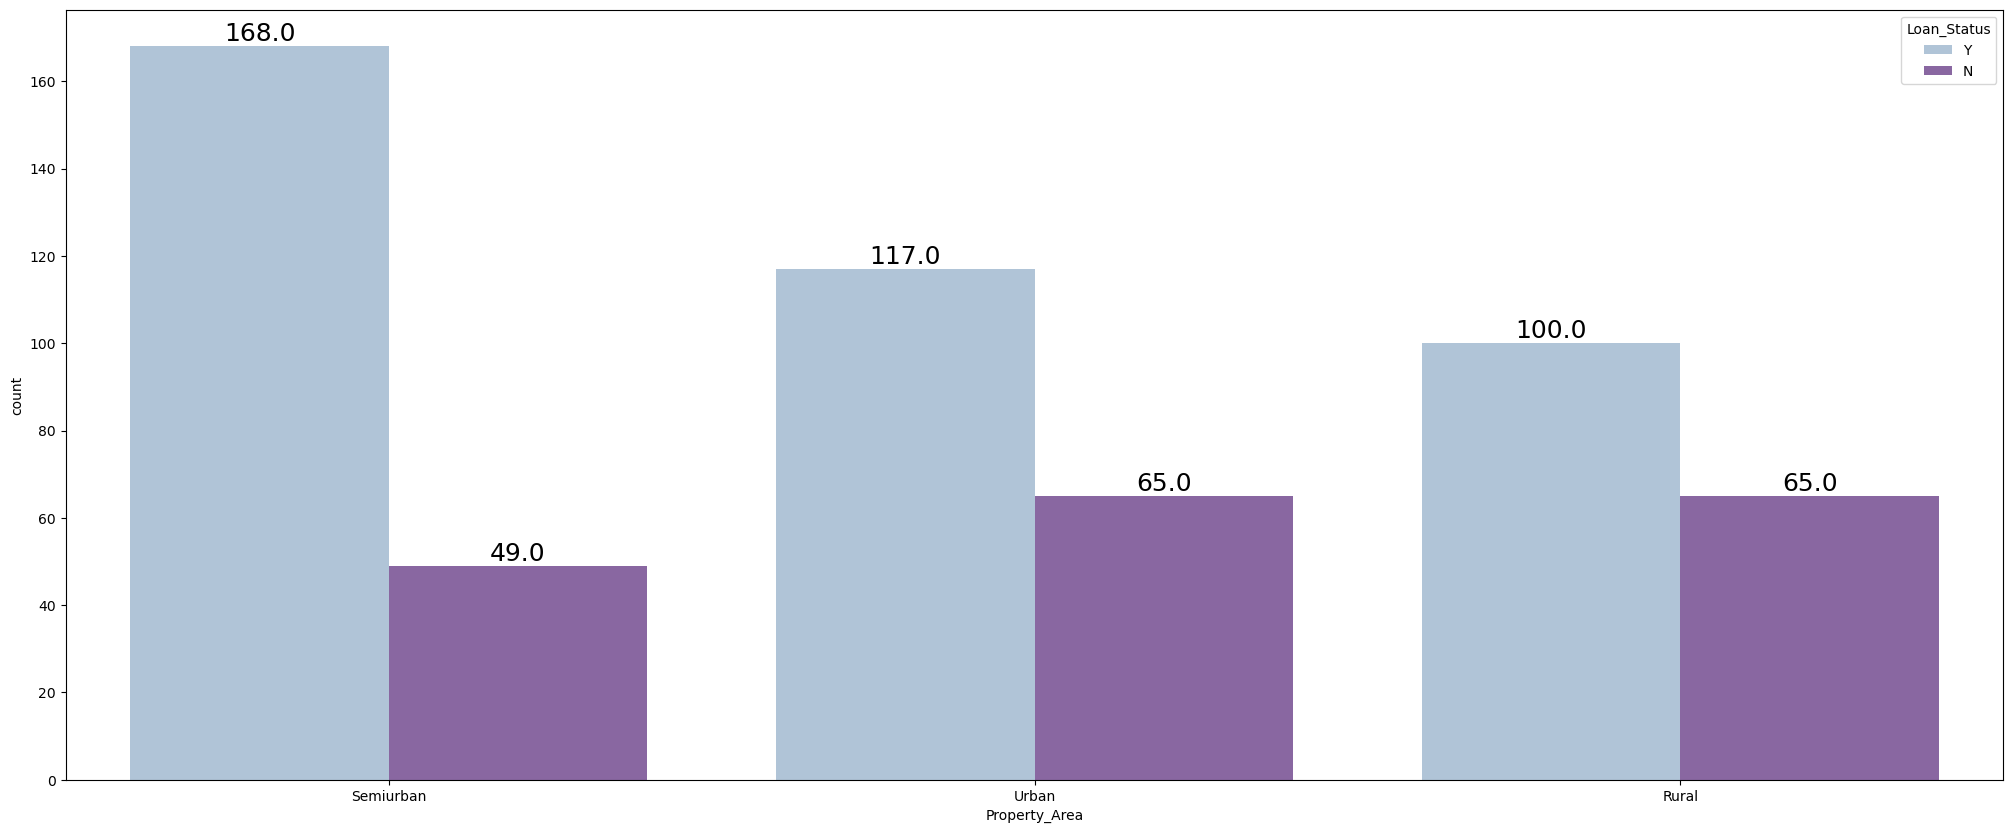

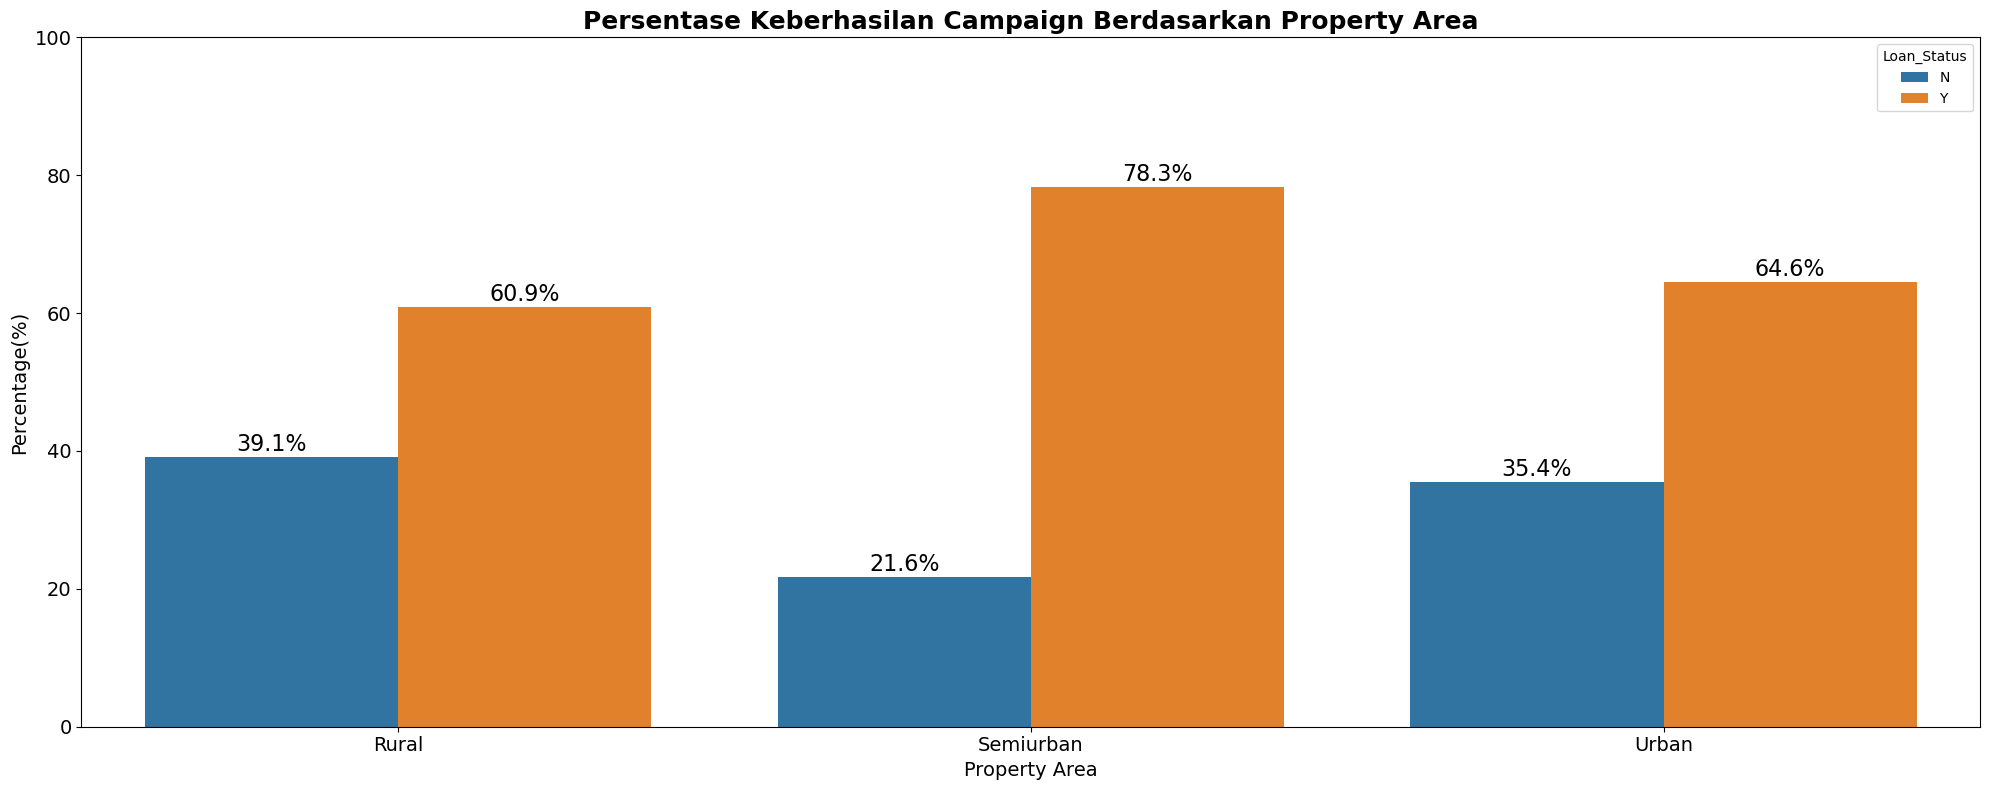

In [422]:
property_groupby1 = df_train.groupby(['Property_Area', 'Loan_Status'])['Loan_ID'].nunique().reset_index(name='UniqueCustomer')
property_groupby2 = df_train.groupby(['Property_Area'])['Loan_ID'].nunique().reset_index(name='AllUniqueCustomer')

property_groupby = property_groupby1.merge(property_groupby2, how = 'inner', on='Property_Area')
property_groupby['PercentUniqueCustomer'] = round(property_groupby['UniqueCustomer']*100.0/property_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
property_vs_y = sns.countplot(x='Property_Area', data=df, order = df['Property_Area'].value_counts().iloc[:15].index,
              hue='Loan_Status', palette='BuPu')

for p in property_vs_y.patches:
    property_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
property_vs_y_percent = sns.barplot(x='Property_Area', y='PercentUniqueCustomer', hue='Loan_Status', data=property_groupby)

for p in property_vs_y_percent.patches:
    property_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Berdasarkan Property Area",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('Property Area', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

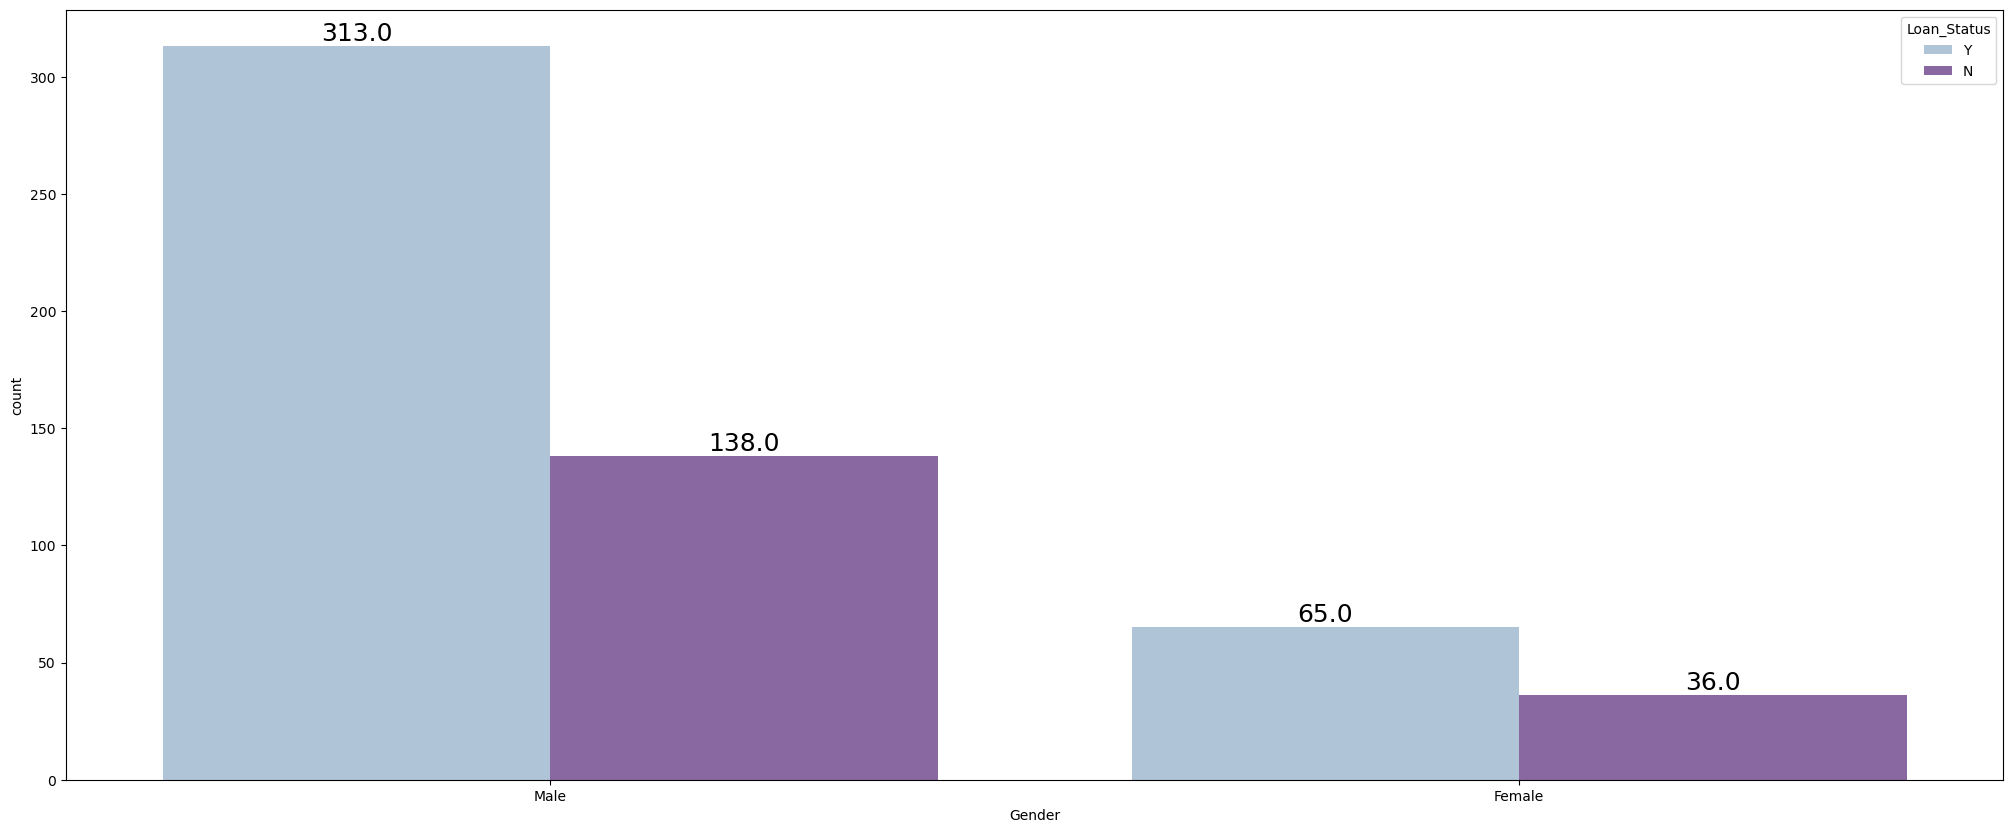

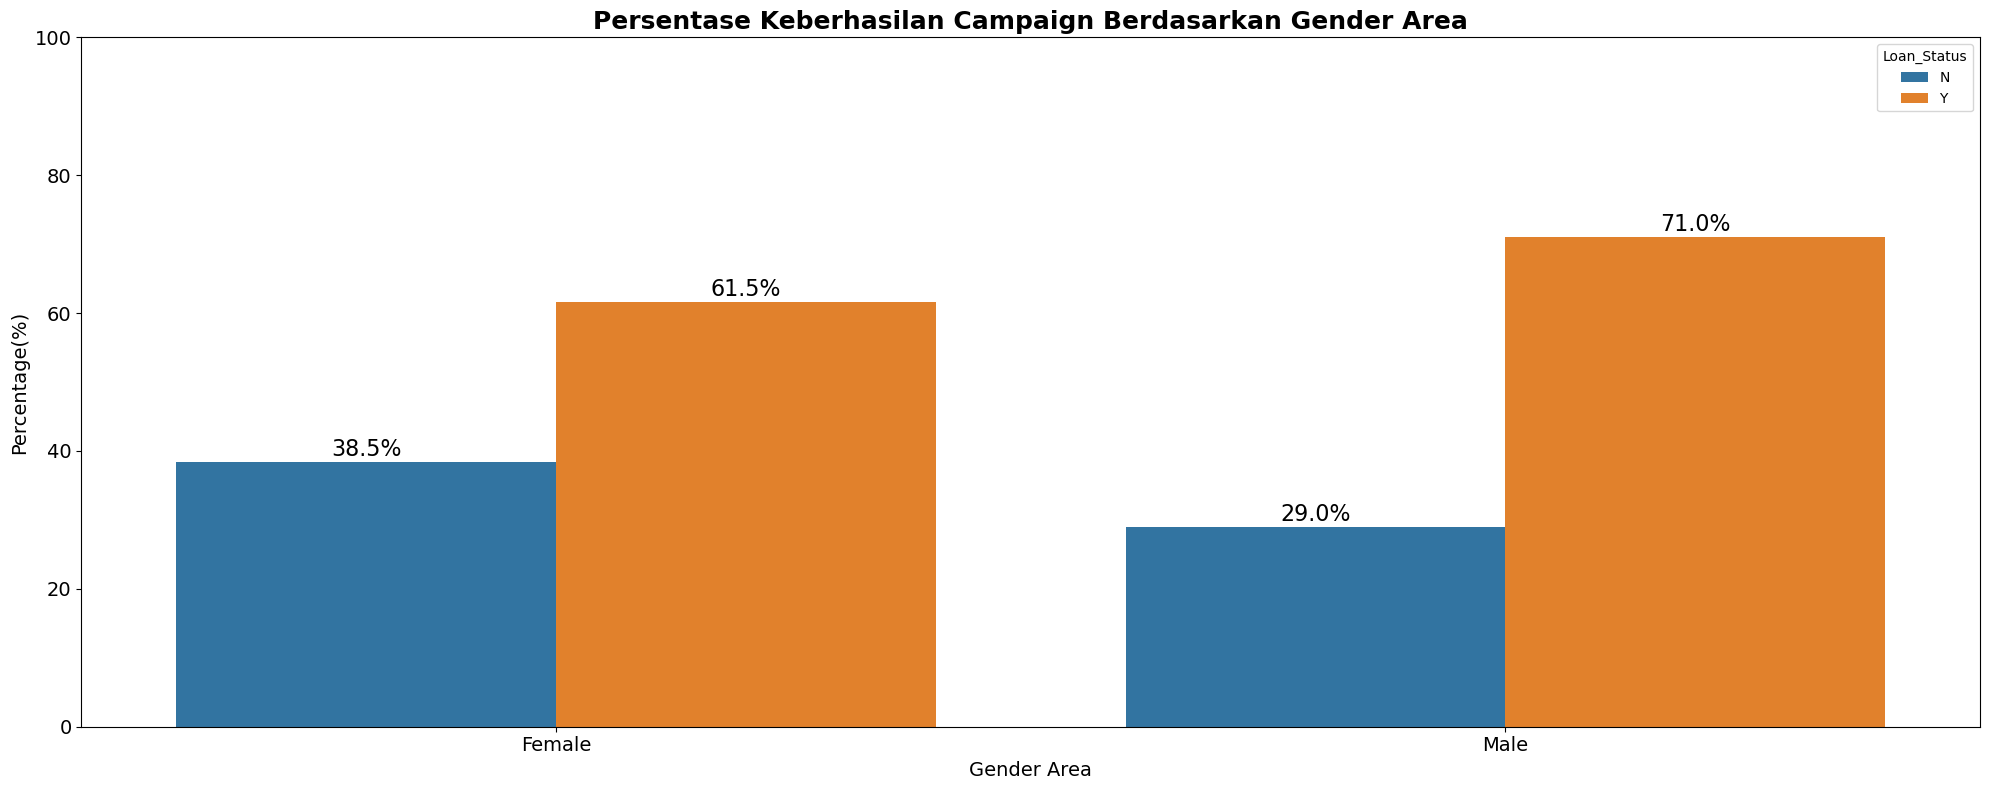

In [423]:
Gender_groupby1 = df_train.groupby(['Gender', 'Loan_Status'])['Loan_ID'].nunique().reset_index(name='UniqueCustomer')
Gender_groupby2 = df_train.groupby(['Gender'])['Loan_ID'].nunique().reset_index(name='AllUniqueCustomer')

Gender_groupby = Gender_groupby1.merge(Gender_groupby2, how = 'inner', on='Gender')
Gender_groupby['PercentUniqueCustomer'] = round(Gender_groupby['UniqueCustomer']*100.0/Gender_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
Gender_vs_y = sns.countplot(x='Gender', data=df, order = df['Gender'].value_counts().iloc[:15].index,
              hue='Loan_Status', palette='BuPu')

for p in Gender_vs_y.patches:
    Gender_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
Gender_vs_y_percent = sns.barplot(x='Gender', y='PercentUniqueCustomer', hue='Loan_Status', data=Gender_groupby)

for p in Gender_vs_y_percent.patches:
    Gender_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Berdasarkan Gender Area",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('Gender Area', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

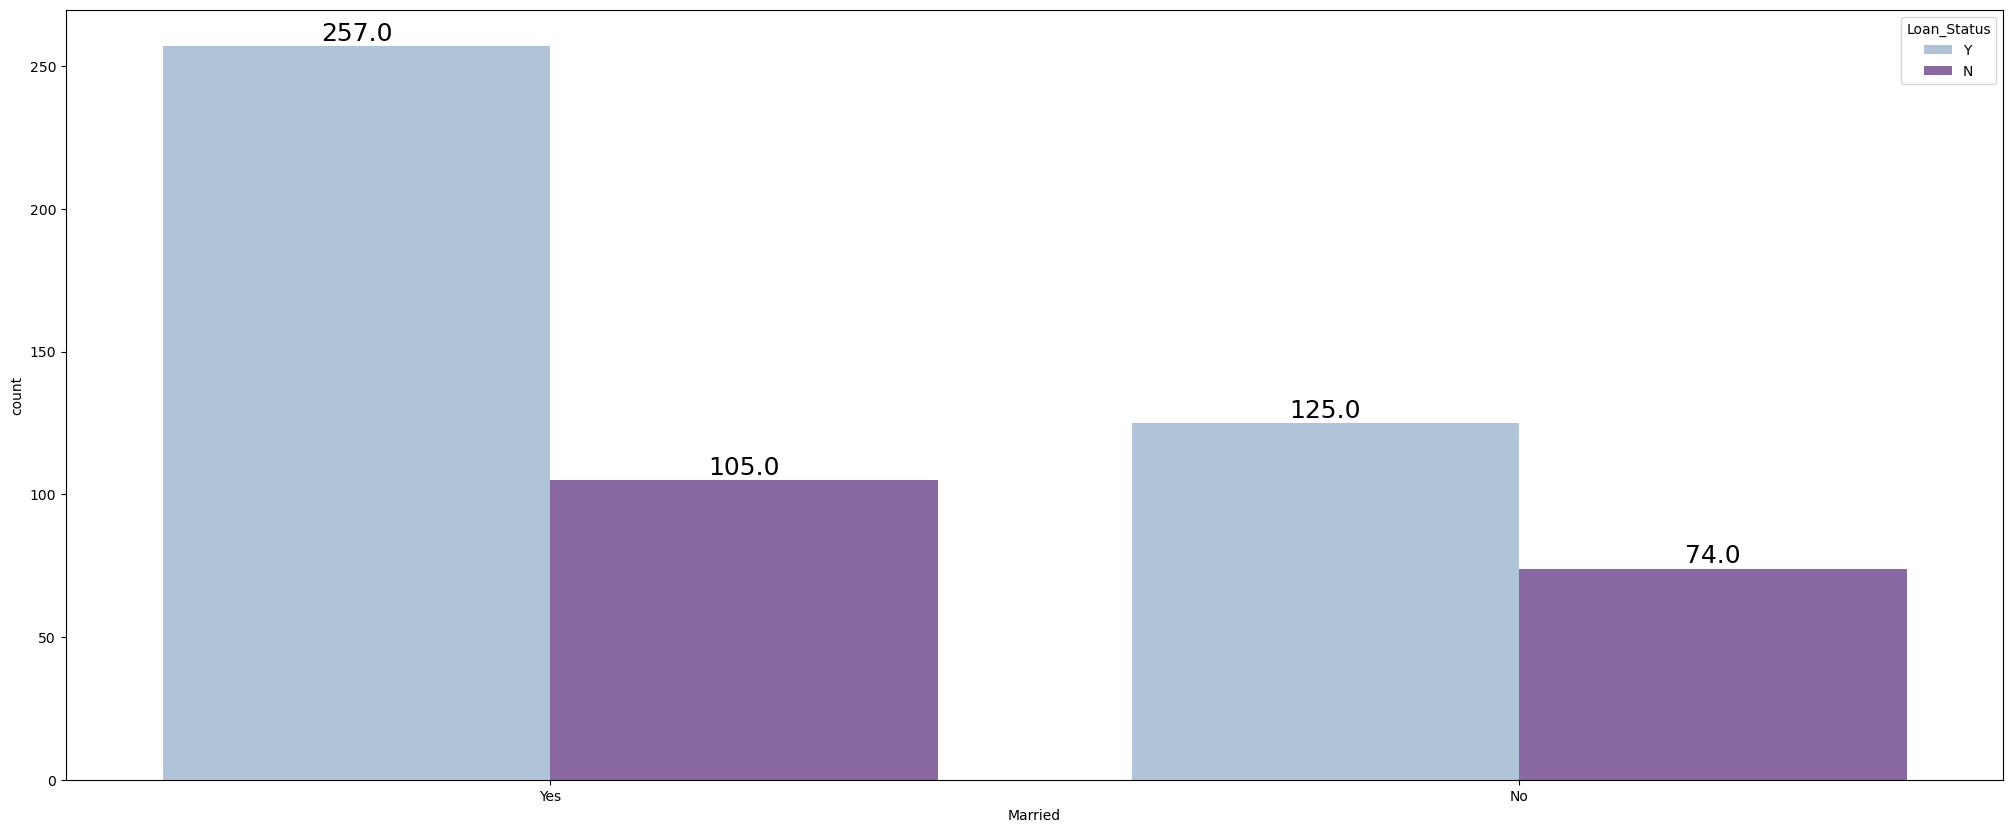

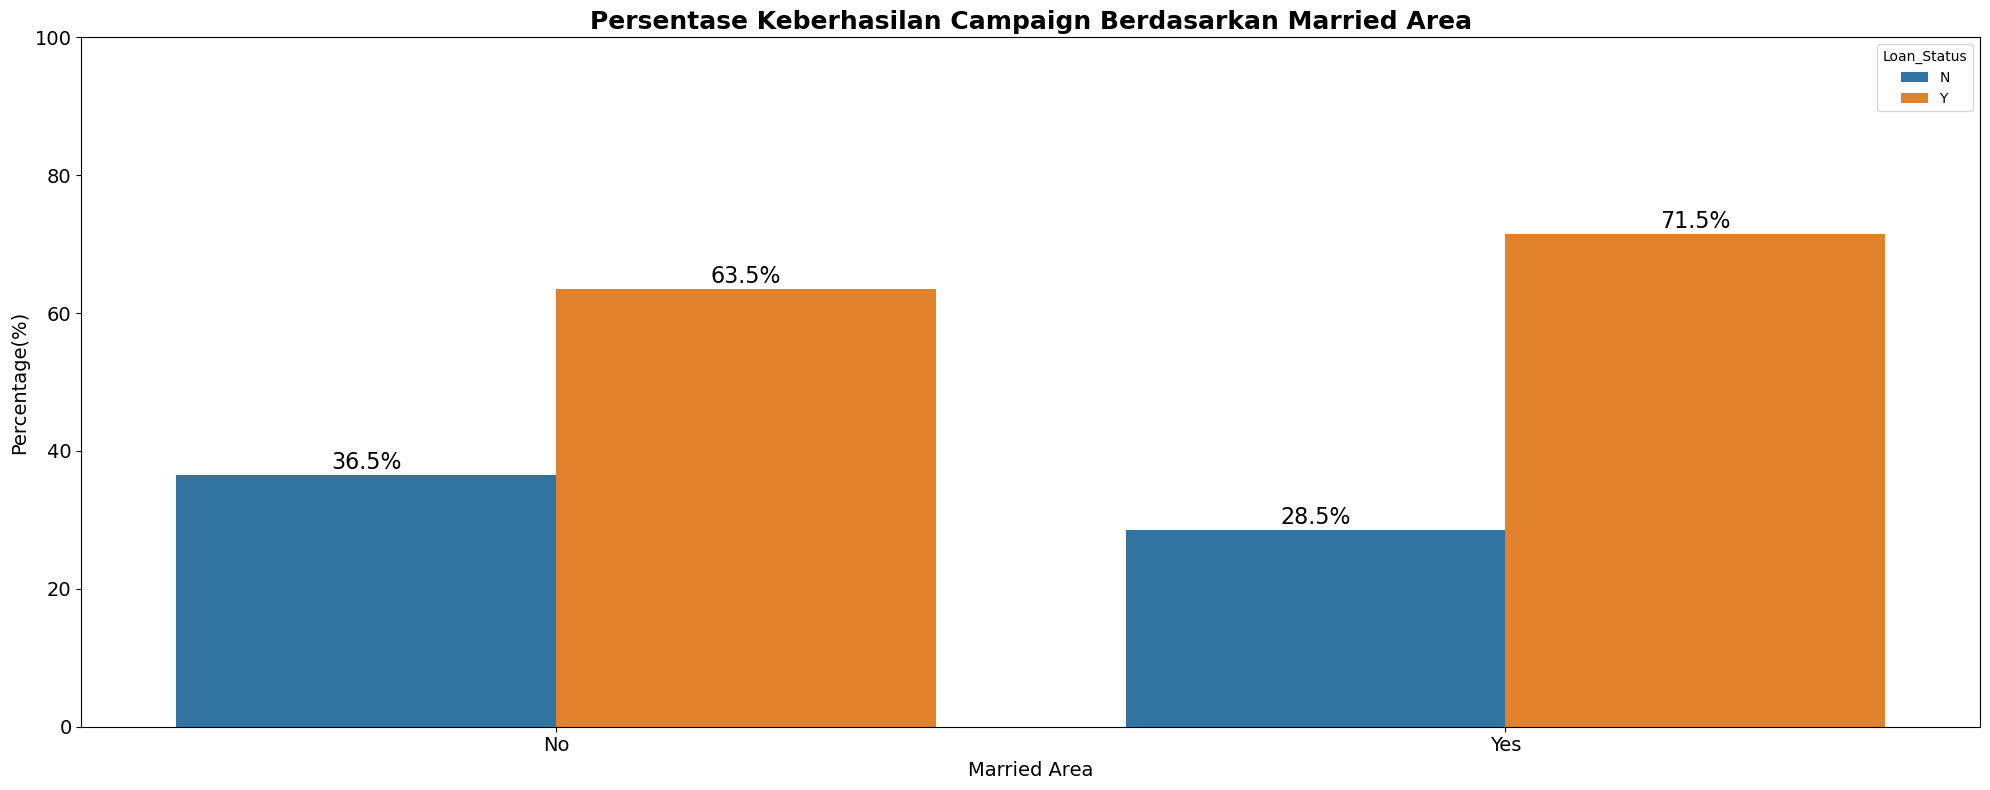

In [424]:
Married_groupby1 = df_train.groupby(['Married', 'Loan_Status'])['Loan_ID'].nunique().reset_index(name='UniqueCustomer')
Married_groupby2 = df_train.groupby(['Married'])['Loan_ID'].nunique().reset_index(name='AllUniqueCustomer')

Married_groupby = Married_groupby1.merge(Married_groupby2, how = 'inner', on='Married')
Married_groupby['PercentUniqueCustomer'] = round(Married_groupby['UniqueCustomer']*100.0/Married_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
Married_vs_y = sns.countplot(x='Married', data=df, order = df['Married'].value_counts().iloc[:15].index,
              hue='Loan_Status', palette='BuPu')

for p in Married_vs_y.patches:
    Married_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
Married_vs_y_percent = sns.barplot(x='Married', y='PercentUniqueCustomer', hue='Loan_Status', data=Married_groupby)

for p in Married_vs_y_percent.patches:
    Married_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Berdasarkan Married Area",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('Married Area', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

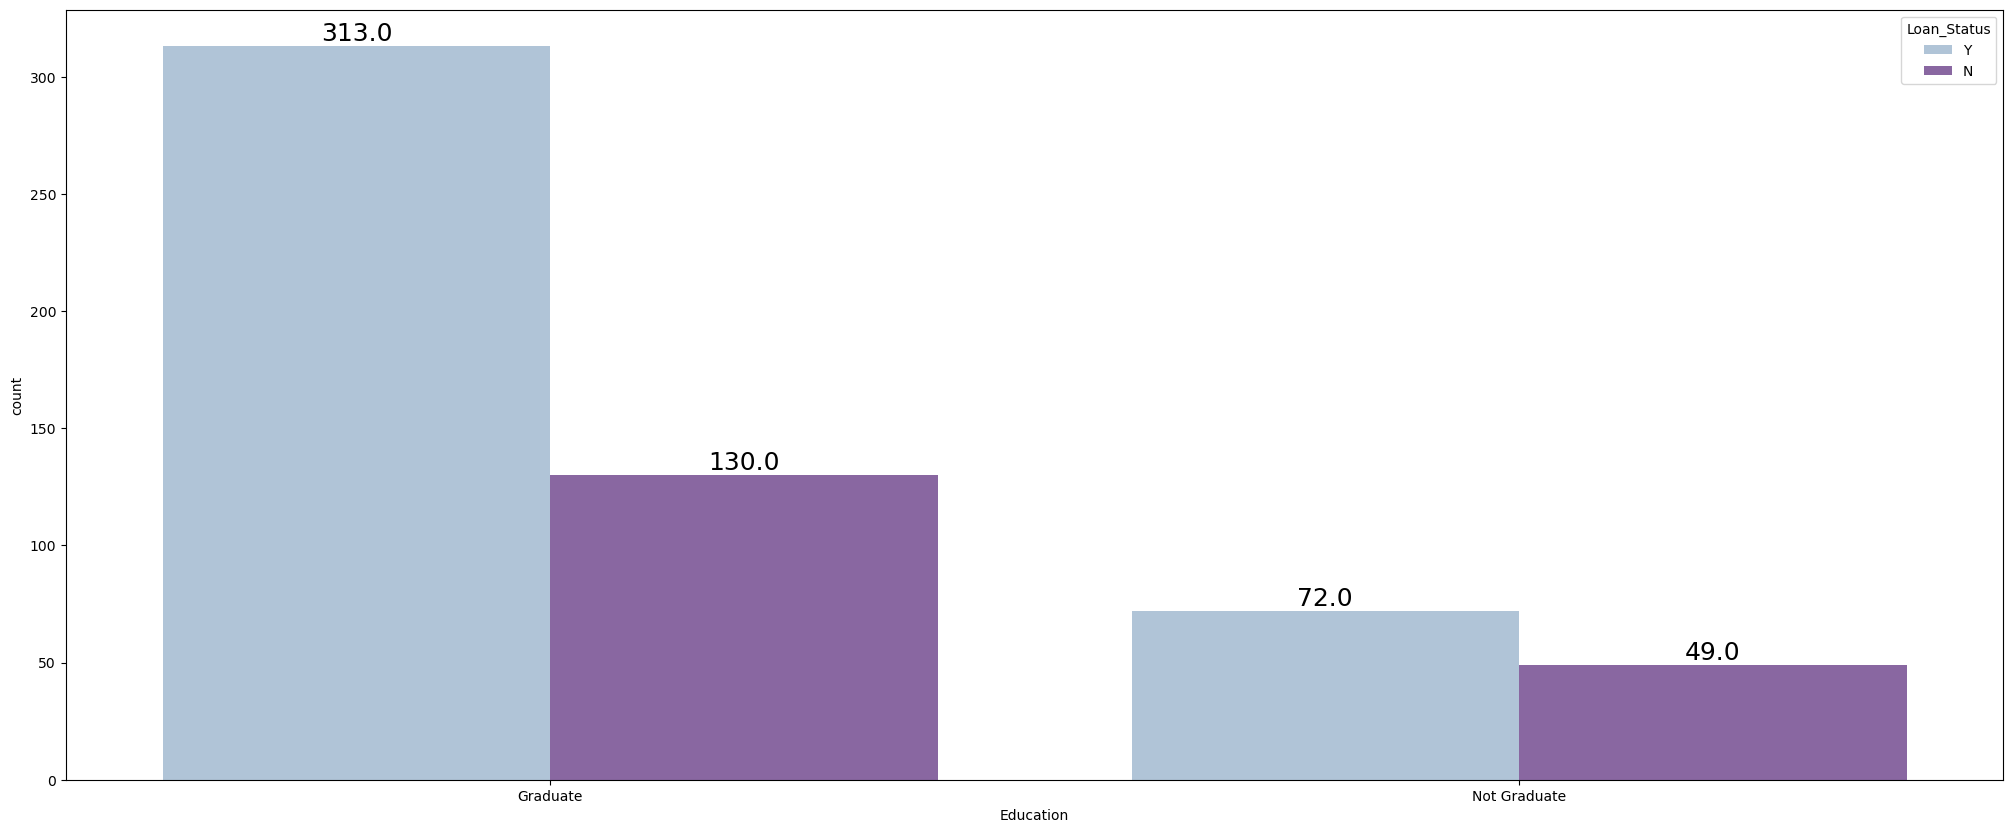

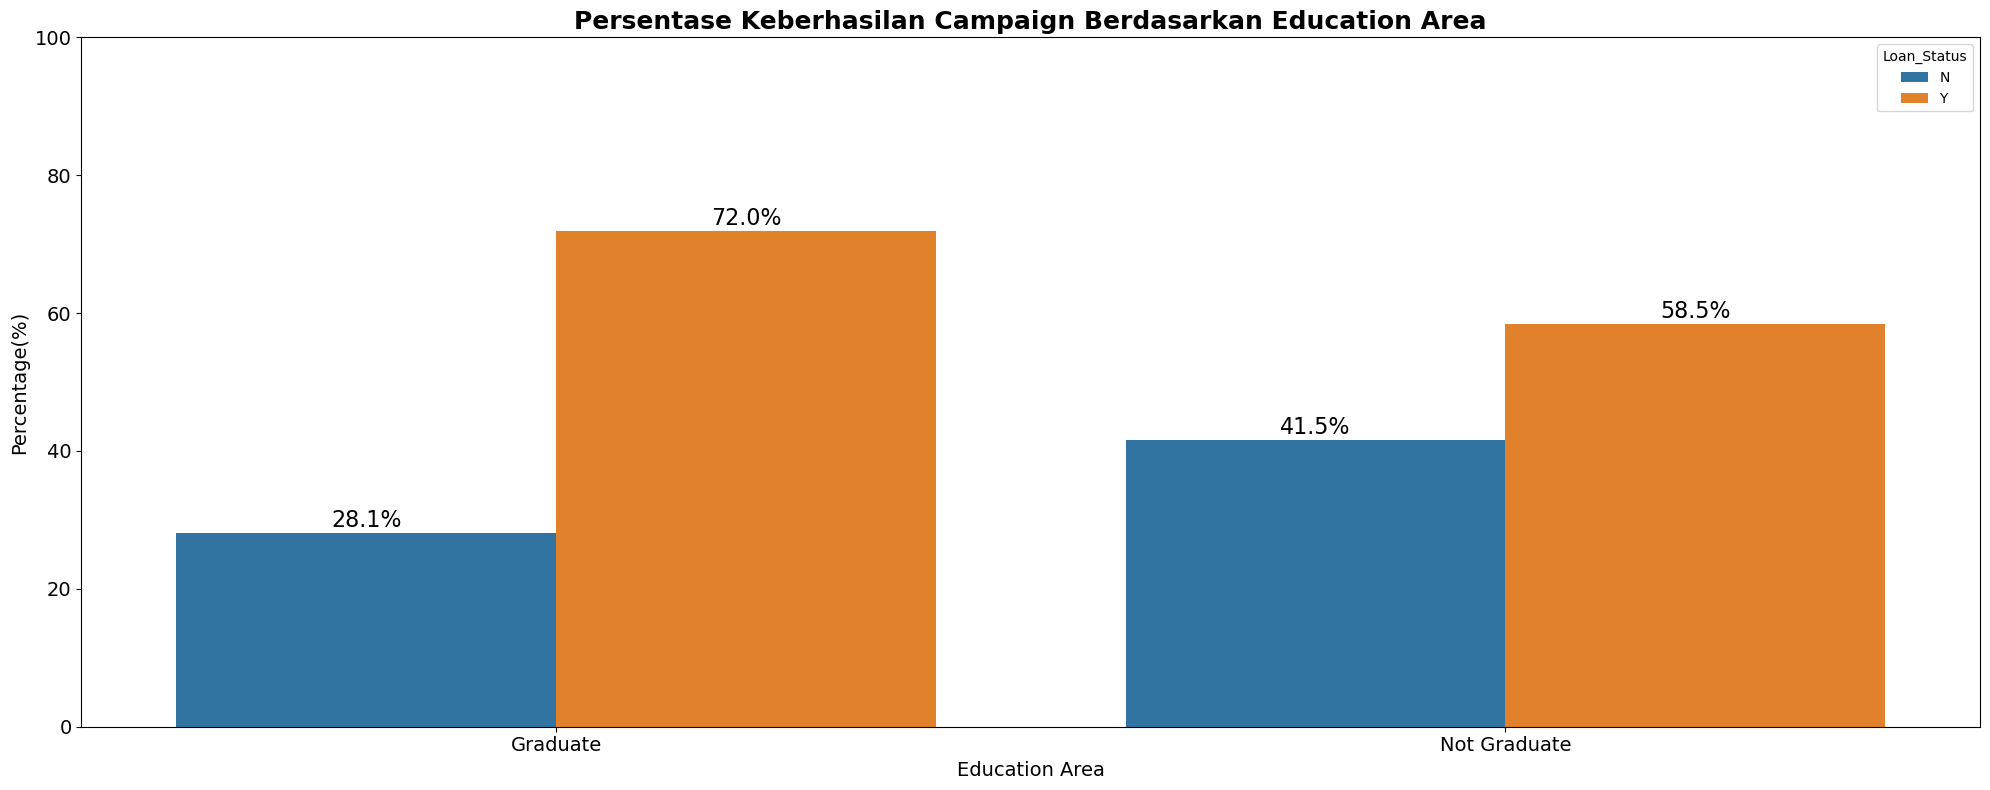

In [425]:
Education_groupby1 = df_train.groupby(['Education', 'Loan_Status'])['Loan_ID'].nunique().reset_index(name='UniqueCustomer')
Education_groupby2 = df_train.groupby(['Education'])['Loan_ID'].nunique().reset_index(name='AllUniqueCustomer')

Education_groupby = Education_groupby1.merge(Education_groupby2, how = 'inner', on='Education')
Education_groupby['PercentUniqueCustomer'] = round(Education_groupby['UniqueCustomer']*100.0/Education_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
Education_vs_y = sns.countplot(x='Education', data=df, order = df['Education'].value_counts().iloc[:15].index,
              hue='Loan_Status', palette='BuPu')

for p in Education_vs_y.patches:
    Education_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
Education_vs_y_percent = sns.barplot(x='Education', y='PercentUniqueCustomer', hue='Loan_Status', data=Education_groupby)

for p in Education_vs_y_percent.patches:
    Education_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Berdasarkan Education Area",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('Education Area', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

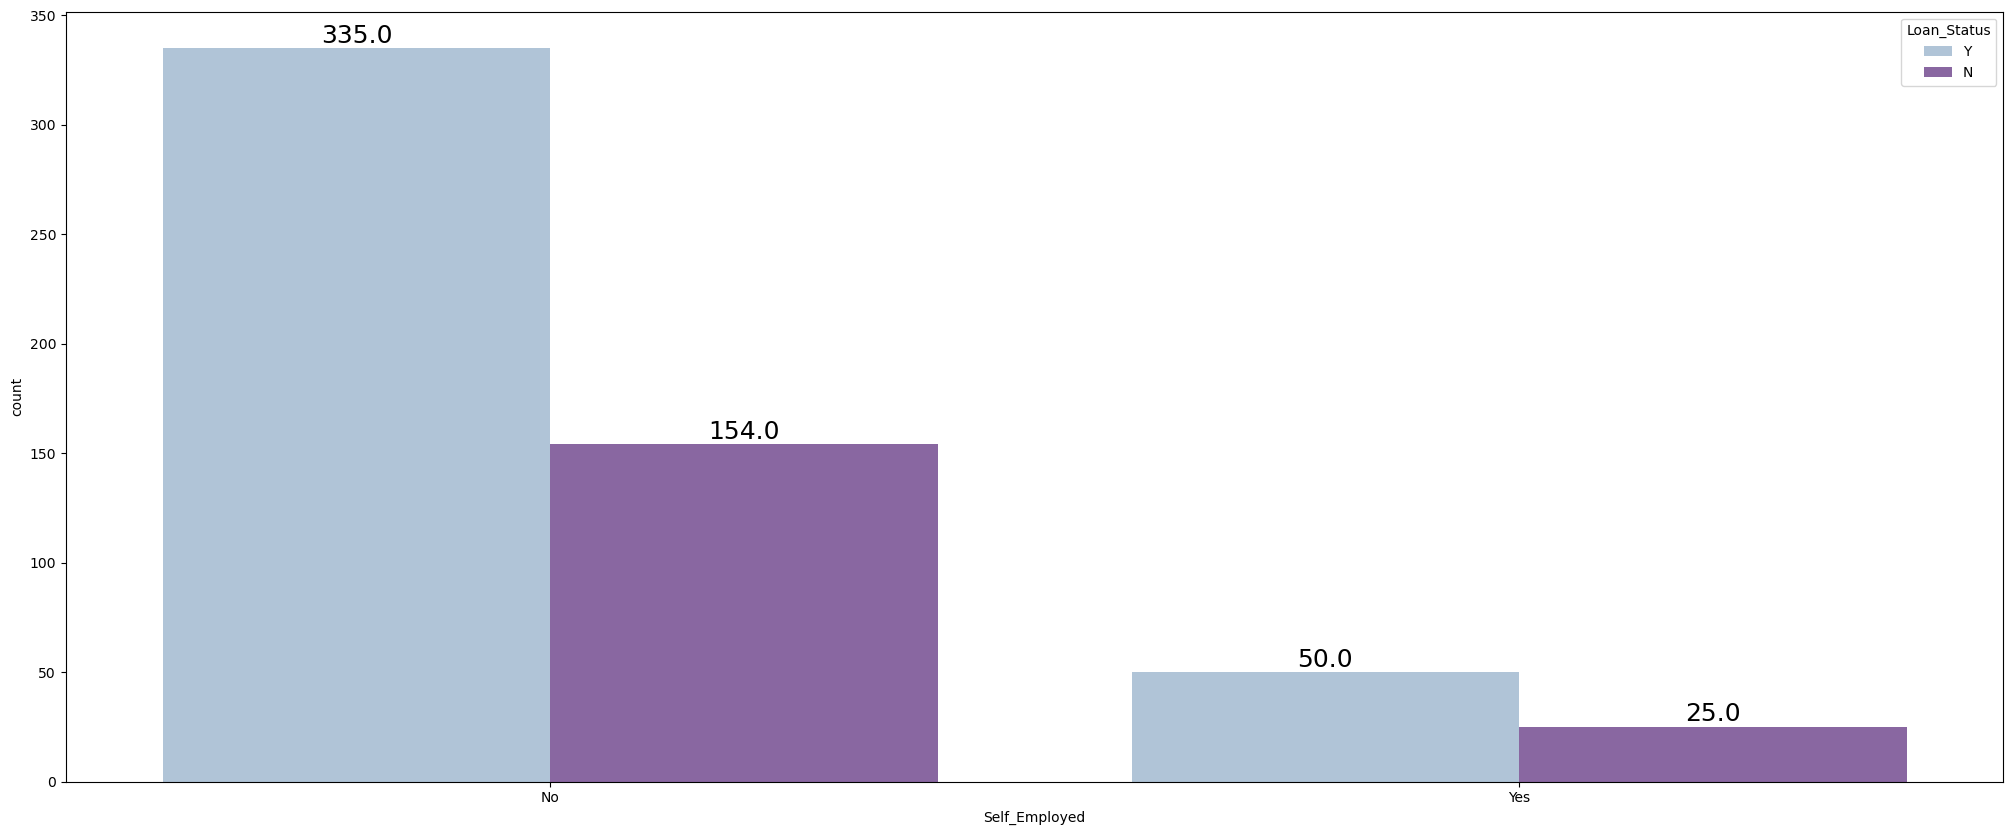

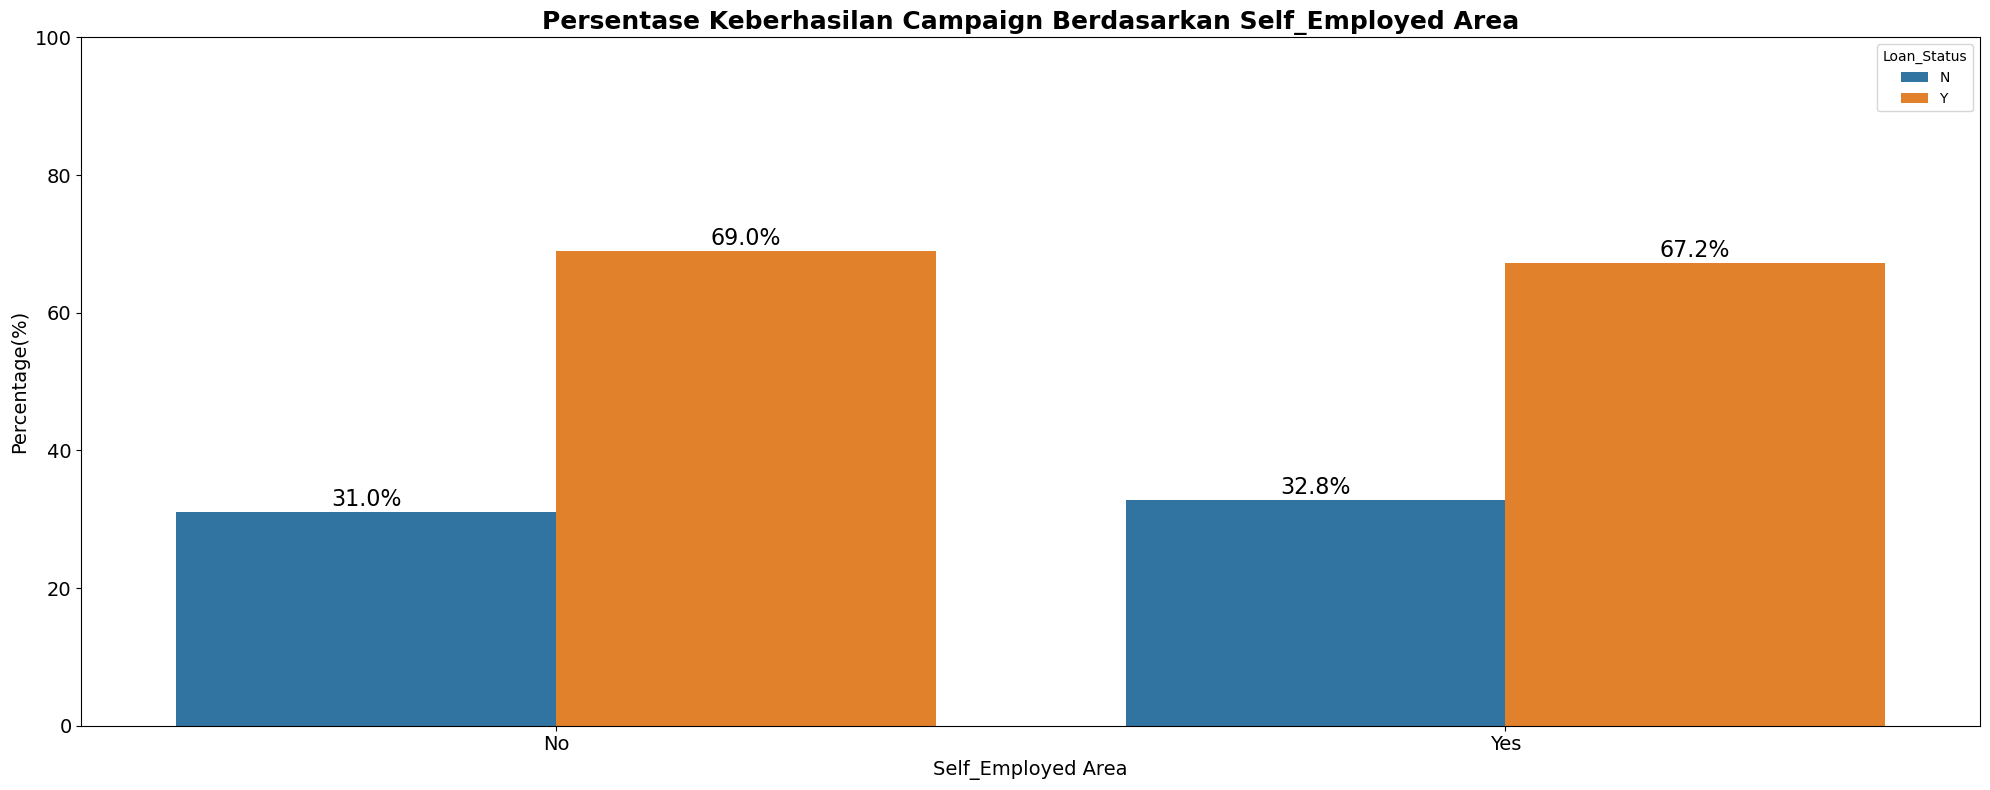

In [426]:
Self_Employed_groupby1 = df_train.groupby(['Self_Employed', 'Loan_Status'])['Loan_ID'].nunique().reset_index(name='UniqueCustomer')
Self_Employed_groupby2 = df_train.groupby(['Self_Employed'])['Loan_ID'].nunique().reset_index(name='AllUniqueCustomer')

Self_Employed_groupby = Self_Employed_groupby1.merge(Self_Employed_groupby2, how = 'inner', on='Self_Employed')
Self_Employed_groupby['PercentUniqueCustomer'] = round(Self_Employed_groupby['UniqueCustomer']*100.0/Self_Employed_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
Self_Employed_vs_y = sns.countplot(x='Self_Employed', data=df, order = df['Self_Employed'].value_counts().iloc[:15].index,
              hue='Loan_Status', palette='BuPu')

for p in Self_Employed_vs_y.patches:
    Self_Employed_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
Self_Employed_vs_y_percent = sns.barplot(x='Self_Employed', y='PercentUniqueCustomer', hue='Loan_Status', data=Self_Employed_groupby)

for p in Self_Employed_vs_y_percent.patches:
    Self_Employed_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Berdasarkan Self_Employed Area",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('Self_Employed Area', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

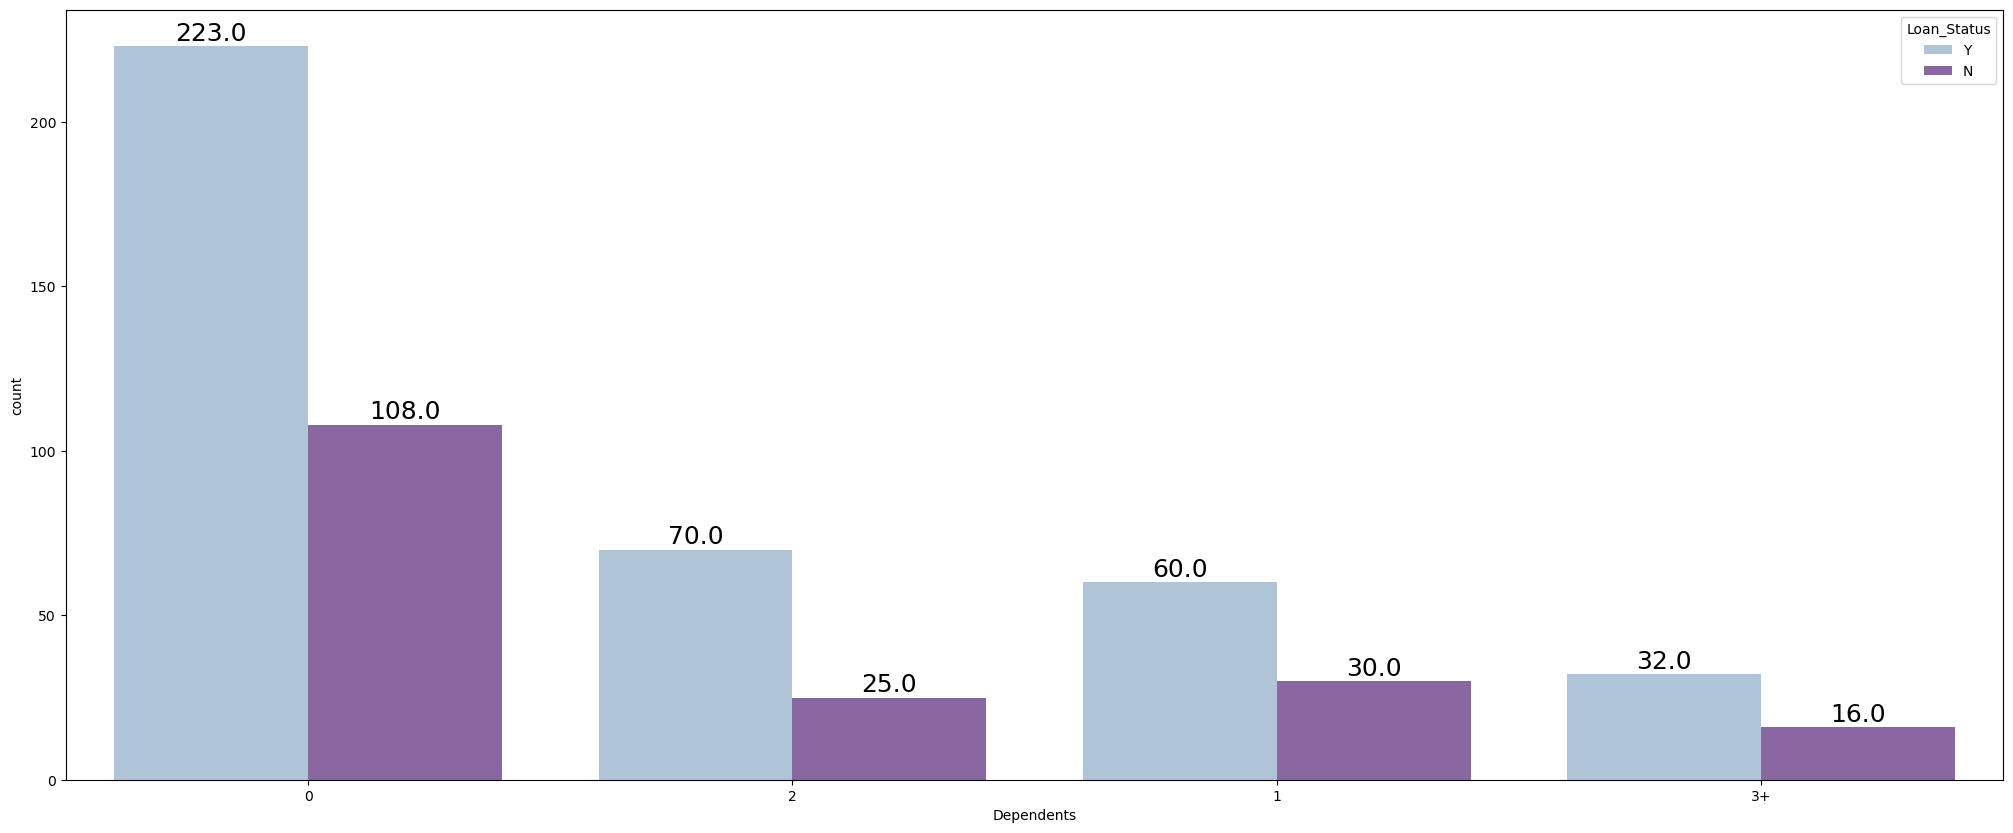

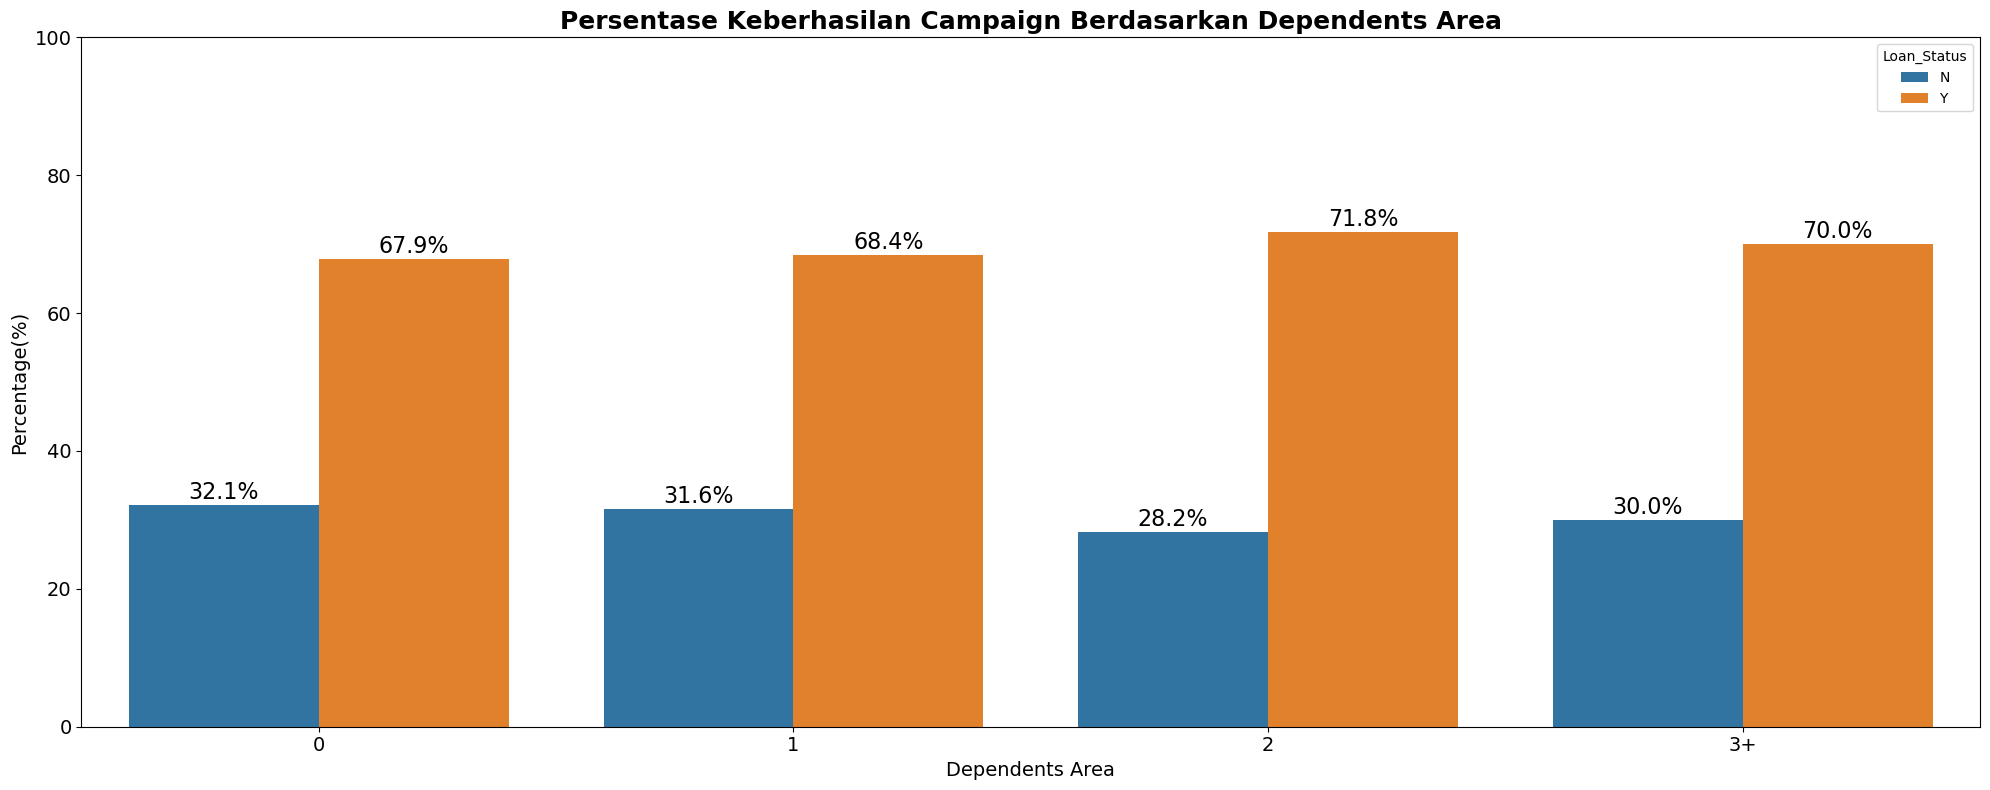

In [427]:
Dependents_groupby1 = df_train.groupby(['Dependents', 'Loan_Status'])['Loan_ID'].nunique().reset_index(name='UniqueCustomer')
Dependents_groupby2 = df_train.groupby(['Dependents'])['Loan_ID'].nunique().reset_index(name='AllUniqueCustomer')

Dependents_groupby = Dependents_groupby1.merge(Dependents_groupby2, how = 'inner', on='Dependents')
Dependents_groupby['PercentUniqueCustomer'] = round(Dependents_groupby['UniqueCustomer']*100.0/Dependents_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
Dependents_vs_y = sns.countplot(x='Dependents', data=df, order = df['Dependents'].value_counts().iloc[:15].index,
              hue='Loan_Status', palette='BuPu')

for p in Dependents_vs_y.patches:
    Dependents_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
Dependents_vs_y_percent = sns.barplot(x='Dependents', y='PercentUniqueCustomer', hue='Loan_Status', data=Dependents_groupby)

for p in Dependents_vs_y_percent.patches:
    Dependents_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Berdasarkan Dependents Area",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('Dependents Area', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

In [428]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [429]:
def process(df_train):

    df_train['Dependents'] = df_train['Dependents'].replace('3+',3)
    
    #convert string to integer
    df_train['Dependents'] = df_train['Dependents'].astype(int)
    #code the gender column in to 1 and 0 with map function
    df_train['Gender'] = df_train['Gender'].map({'Male':1,'Female':0})
    #code the Married column in to 1 and 0 with map function
    df_train['Married'] = df_train['Married'].map({'Yes':1,'No':0})
    #code the Graduate column in to 1 and 0 with map function
    df_train['Education'] = df_train['Education'].map({'Graduate':1,'Not Graduate':0})
    #code the self_Employed column in to 1 and 0 with map function
    df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes':1,'No':0})    
    #apply OHT to property area
    df_train=df_train.drop('Loan_ID',axis = 1)
    #cols=['Property_Area']
    ohe = OneHotEncoder(sparse = False)
    transformed=ohe.fit_transform(df_train[['Property_Area']])
    
    #adding transformed values to df_train
    df_train[ohe.categories_[0]]=transformed
    df_train = df_train.drop('Property_Area',axis=1)
    
    return df_train

In [430]:
scale_mapper_stat_gender = {"Male":1, "Female":0}
df_train["Gender"] = df_train["Gender"].replace(scale_mapper_stat_gender)

scale_mapper_stat_status = {"Yes":1, "No":0}
df_train["Married"] = df_train["Married"].replace(scale_mapper_stat_status)

scale_mapper_stat_depent = {"0":0, "1":1, "2":2, "3+":3}
df_train["Dependents"] = df_train["Dependents"].replace(scale_mapper_stat_depent)

scale_mapper_stat_edu = {"Not Graduate":0, "Graduate":1}
df_train["Education"] = df_train["Education"].replace(scale_mapper_stat_edu)

scale_mapper_stat_property = {"Semiurban":0, "Urban":1, "Rural":2}
df_train["Property_Area"] = df_train["Property_Area"].replace(scale_mapper_stat_property)

scale_mapper_stat_loan = {"Y":1, "N":0}
df_train["Loan_Status"] = df_train["Loan_Status"].replace(scale_mapper_stat_loan)

In [431]:
scale_mapper_stat_status = {"Yes":1, "No":0}
df_train["Married"] = df_train["Married"].replace(scale_mapper_stat_status)

In [432]:
scale_mapper_stat_depent = {"0":0, "1":1, "2":2, "3+":3}
df_train["Dependents"] = df_train["Dependents"].replace(scale_mapper_stat_depent)

In [433]:
scale_mapper_stat_edu = {"Not Graduate":0, "Graduate":1}
df_train["Education"] = df_train["Education"].replace(scale_mapper_stat_edu)

In [434]:
scale_mapper_stat_sm = {"Yes":1, "No":0}
df_train["Self_Employed"] = df_train["Self_Employed"].replace(scale_mapper_stat_sm)

In [435]:
scale_mapper_stat_property = {"Semiurban":0, "Urban":1, "Rural":2}
df_train["Property_Area"] = df_train["Property_Area"].replace(scale_mapper_stat_property)

In [436]:
scale_mapper_stat_loan = {"Y":1, "N":0}
df_train["Loan_Status"] = df_train["Loan_Status"].replace(scale_mapper_stat_loan)

In [437]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            503 non-null    object 
 1   Gender             494 non-null    float64
 2   Married            500 non-null    float64
 3   Dependents         503 non-null    int64  
 4   Education          503 non-null    int64  
 5   Self_Employed      503 non-null    int64  
 6   ApplicantIncome    503 non-null    int64  
 7   CoapplicantIncome  503 non-null    float64
 8   LoanAmount         503 non-null    float64
 9   Loan_Amount_Term   503 non-null    float64
 10  Credit_History     503 non-null    float64
 11  Property_Area      503 non-null    int64  
 12  Loan_Status        503 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 55.0+ KB


In [438]:
df_train = df_train.dropna() 

In [439]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             491 non-null    float64
 2   Married            491 non-null    float64
 3   Dependents         491 non-null    int64  
 4   Education          491 non-null    int64  
 5   Self_Employed      491 non-null    int64  
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         491 non-null    float64
 9   Loan_Amount_Term   491 non-null    float64
 10  Credit_History     491 non-null    float64
 11  Property_Area      491 non-null    int64  
 12  Loan_Status        491 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 53.7+ KB


In [440]:
df_train.sample(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
481,LP002536,1.0,1.0,3,0,0,3095,0.0,113.0,360.0,1.0,2,1
32,LP001097,1.0,0.0,1,1,1,4692,0.0,106.0,360.0,1.0,2,0
184,LP001639,0.0,1.0,0,1,0,3625,0.0,108.0,360.0,1.0,0,1
111,LP001387,0.0,1.0,0,1,0,2929,2333.0,139.0,360.0,1.0,0,1
571,LP002847,1.0,1.0,0,1,0,5116,1451.0,165.0,360.0,0.0,1,0
326,LP002068,1.0,0.0,0,1,0,4917,0.0,130.0,360.0,0.0,2,1
194,LP001664,1.0,0.0,0,1,0,4191,0.0,120.0,360.0,1.0,2,1
535,LP002732,1.0,0.0,0,0,0,2550,2042.0,126.0,360.0,1.0,2,1
31,LP001095,1.0,0.0,0,1,0,3167,0.0,74.0,360.0,1.0,1,0
408,LP002315,1.0,1.0,1,1,0,8300,0.0,152.0,300.0,0.0,0,0


In [441]:
scale_mapper_stat_gender = {"Male":1, "Female":0}
df_test["Gender"] = df_test["Gender"].replace(scale_mapper_stat_gender)

scale_mapper_stat_status = {"Yes":1, "No":0}
df_test["Married"] = df_test["Married"].replace(scale_mapper_stat_status)

scale_mapper_stat_depent = {"0":0, "1":1, "2":2, "3+":3}
df_test["Dependents"] = df_test["Dependents"].replace(scale_mapper_stat_depent)

scale_mapper_stat_edu = {"Not Graduate":0, "Graduate":1}
df_test["Education"] = df_test["Education"].replace(scale_mapper_stat_edu)

scale_mapper_stat_property = {"Semiurban":0, "Urban":1, "Rural":2}
df_test["Property_Area"] = df_test["Property_Area"].replace(scale_mapper_stat_property)


In [442]:
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,1,No,5720,0,110.0,360.0,1.0,1
1,LP001022,1.0,1,1.0,1,No,3076,1500,126.0,360.0,1.0,1
2,LP001031,1.0,1,2.0,1,No,5000,1800,208.0,360.0,1.0,1
3,LP001035,1.0,1,2.0,1,No,2340,2546,100.0,360.0,NaN,1
4,LP001051,1.0,0,0.0,0,No,3276,0,78.0,360.0,1.0,1


In [443]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [444]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.5f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.5f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.5f" % recall_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

In [445]:
X_train= df_train[[col for col in df_train.columns if (str(df_train[col].dtype) != 'object') and col not in ['Loan_Status']]]
y_train= df_train['Loan_Status'].values

In [446]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

Logistic Regression

In [447]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [449]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [450]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [451]:
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.78378
Precision (Test Set): 0.82353
Recall (Test Set): 0.89908
AUC: 0.68


In [452]:
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.82


In [453]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8250728862973761
Test score:0.7837837837837838


Decision Tree

In [454]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.70270
Precision (Test Set): 0.81553
Recall (Test Set): 0.77064
AUC: 0.64


In [455]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.7027027027027027


In [456]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77027
Precision (Test Set): 0.81513
Recall (Test Set): 0.88991
AUC: 0.66
